<!--HEADER-->
[*NBBinder test on a collection of notebooks about some thermodynamic properperties of water*](https://github.com/rmsrosa/nbbinder)

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/nbbinder/blob/master/tests/nb_export_builds/nb_water_md/05.00-Best_AIC_Fitting.md"><img align="left" src="https://img.shields.io/badge/view-markdown-orange" alt="View Markdown" title="View Markdown"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/nbbinder/blob/master/tests/nb_export_builds/nb_water_pdf/05.00-Best_AIC_Fitting.pdf"><img align="left" src="https://img.shields.io/badge/view-pdf-blueviolet" alt="View PDF" title="View PDF"></a>&nbsp;

<!--NAVIGATOR-->
[<- High-Dimensional Fittings](04.00-High_Dim_Fittings.ipynb) | [Water Contents](00.00-Water_Contents.ipynb) | [References](BA.00-References.ipynb) | [References ->](BA.00-References.ipynb)

---


# Choosing the Best Fit with AIC

In this final section, we use the *Akaike Information Criterion (AIC)* (see [Burnham \& Anderson (2002); Bender (2000)](BA.00-References.ipynb)) to select the most efficient polynomial approximation.

## Importing the libraries

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Akaike Information Criterion

Beink $k$ the number of parameters in the model, $N$ the number of data points in the sample, and $E$ the mean quadratic error with the approximation with $k$ parameters, the **Akaike Information Criterion (AIC)** is given by

$$
  \text{AIC} = N\ln(E) + 2k.
$$

The first term decreases with $E$, but the second term penalizes a high number of parameters.

There are a number of other criteria, such as *Bayesian information criterion (BIC)*, *Mallow's $C_p$*, *AICc* (for a low number of samples), *adjusted $R^2$*; *ridge regression*; and *cross validation*.

### AIC for the approximating polynomials

In our case, a polynomial model of degree $j$ has $k=j+1$ parameters. Denoting $E_j$ as the mean quadratic error associated with this polynomial, we find the $\text{AIC}_j$ for each polynomial as

$$
\text{AIC}_j = N\ln(E_j) + 2(j+1).
$$


## Loading the data from file

For the computation of the $\text{AIC}_j$ values, we first load the data from file.

This time, we use `csv` to read only the header of the file, contained in the first two rows, and then we use `numpy` to read the temperature and density values, which are in the remaining rows. This is a more efficient way to load the data.

### Loading the header

We start by reading the header. We read the first two lines of the file and make a dictionary from it.

In [2]:
water_csv_reader = csv.reader(open('water.csv',"r"), delimiter=",")
line1, line2 = next(water_csv_reader), next(water_csv_reader)
header = dict([(line1[i], line2[i]) for i in range(3)])
header

{'temp': 'Temperature (C)',
 'density': 'Density (g/cm^3)',
 'viscosity': 'Viscosity (cm^2/s)'}

### Loading the data

Next we read the data values for temperature and density, which are in the first and second columns, so we skip the first two rows and ignore the last column.

In [3]:
T, f = np.loadtxt(open('water.csv', "r"), delimiter=",", skiprows=2, usecols=(0,1), unpack=True)

We also define two auxiliary variables related to the number of rows.

In [4]:
N = len(T)
N_half = int(N/2)

### Computing the mean quadratic error

With the data in memory, we compute the $\text{AIC}_j$ values.

In [5]:
A = list()
Err = list()
for j in range(N_half):
    A.append(np.vstack([T**i for i in range(j+1)]).T)
    Err.append(np.linalg.lstsq(A[j], f, rcond=None)[1][0]/N)
    print(f'j={j}: Error={Err[j]:.2e}')    

j=0: Error=1.75e-04
j=1: Error=9.22e-06
j=2: Error=1.33e-07
j=3: Error=3.16e-09
j=4: Error=3.27e-10
j=5: Error=2.64e-10
j=6: Error=2.64e-10


### Computing the AIC values

In [6]:
AIC = [len(T)*np.log(Err[j]) + 2*(j+2) for j in range(N_half)]
for j in range(len(AIC)):
    print(f'j={j}: AIC={AIC[j]:.2f}')

j=0: AIC=-125.74
j=1: AIC=-167.91
j=2: AIC=-229.52
j=3: AIC=-283.59
j=4: AIC=-315.63
j=5: AIC=-316.81
j=6: AIC=-314.83


### Plotting the AIC value

Finally, we plot the AIC values in terms of the degree of the polynomials.

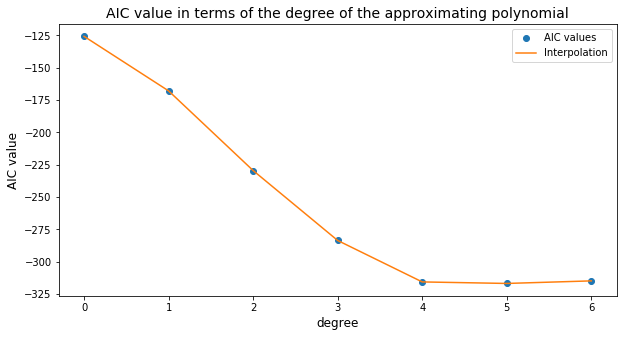

In [7]:
plt.figure(figsize=(10,5))
plt.plot(range(len(AIC)),AIC, 'o', color='tab:blue', label='AIC values')
plt.plot(range(len(AIC)), AIC, color='tab:orange', label='Interpolation')
plt.legend()
plt.xlabel('degree', fontsize=12)
plt.ylabel('AIC value', fontsize=12)
plt.title('AIC value in terms of the degree of the approximating polynomial', fontsize=14)
plt.show()

### Final comments

The use of a model selection criterion such as the AIC is important when we have a large number of data that is not quite accurately approximated by a model. Nevertheless, the exercise above is instructive.

<!--NAVIGATOR-->

---
[<- High-Dimensional Fittings](04.00-High_Dim_Fittings.ipynb) | [Water Contents](00.00-Water_Contents.ipynb) | [References](BA.00-References.ipynb) | [References ->](BA.00-References.ipynb)